170498071/170498071 [==============================] - 2s 0us/step
Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
 [[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
 

[0.639274001121521, 0.8015999794006348]

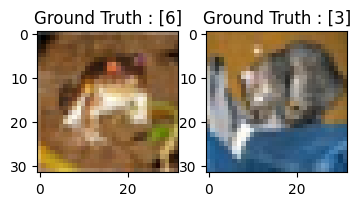

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator

# Adjust this path to point to your CIFAR-10 dataset directory
cifar10_dir = '/content/cifar10_trained_model.h5 '

# Example of loading CIFAR-10 using Keras
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data /= 255
test_data /= 255
print("",train_data[0])
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))

    return model
model1 = createModel()
batch_size = 256
epochs = 50
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()
history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))
model1.evaluate(test_data, test_labels_one_hot)






In [24]:
import cv2
import numpy as np
from keras.models import load_model

# Load your trained model
model = load_model('/content/cifar10_trained_model.h5')

# Modify the image path to the path of your image
image_path = '/content/airplane.jpeg'

# Load your own image
image = cv2.imread(image_path)

# Preprocess your image
# Resize to match the input size of your model
# For example, if your model expects images of size (32, 32, 3)
image = cv2.resize(image, (32, 32))
# Convert to float32 and normalize
image = image.astype('float32') / 255.0
# Reshape to match the input shape of your model
image = np.expand_dims(image, axis=0)

# Make predictions
predictions = model.predict(image)

# Interpret predictions
# Assuming your model outputs probabilities for each class
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_class = class_labels[np.argmax(predictions)]

print("Predicted Class:", predicted_class)


1/1 [==============================] - 0s 118ms/step
Predicted Class: airplane


In [23]:
import cv2
import numpy as np
from keras.models import load_model

# Load your trained model
model = load_model('/content/cifar10_trained_model.h5')

# Modify the image path to the path of your image
image_path = '/content/cat image.jpeg'



image = cv2.imread(image_path)

# Preprocess your image
# Resize to match the input size of your model
# For example, if your model expects images of size (32, 32, 3)
image = cv2.resize(image, (32, 32))
# Convert to float32 and normalize
image = image.astype('float32') / 255.0
# Reshape to match the input shape of your model
image = np.expand_dims(image, axis=0)

# Make predictions
predictions = model.predict(image)

# Interpret predictions
# Assuming your model outputs probabilities for each class
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_class = class_labels[np.argmax(predictions)]

print("Predicted Class:", predicted_class)


1/1 [==============================] - 0s 169ms/step
Predicted Class: cat
